In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
import nltk
import string
os.chdir('/Users/ethancz/Library/Python/3.8/lib/python/site-packages')
import textblob

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [5]:
os.chdir('/Users/ethancz/Downloads/data/ttr data/nlp/project 1 (first corpus analysis)/data')
corpus = pd.read_csv('ttr corpus.csv', header=None, names=['text'])

In [6]:
#Splitting message into individual tokens
corpus['tokens'] = corpus['text'].str.split(' ')

In [8]:
#Appending every individual word in the corpus to a list
words = []
for i in range(corpus.shape[0]):
    message_length = len(corpus['tokens'].iloc[i])
    for j in range(message_length):
        words.append(corpus['tokens'].iloc[i][j])

In [9]:
#Removing capitalization and punctuation from the list of all individual words
cleanwords = []
for word in words:
    word = word.lower()
    word = word.translate(str.maketrans('', '', string.punctuation))
    cleanwords.append(word)

In [10]:
#Message length in tokens
corpus['length'] = corpus['tokens'].apply(len)

In [11]:
#Message length in characters
corpus['charlength'] = corpus['text'].apply(len)

In [12]:
#Functions to get subjectivity and polarity for each message

def get_subjectivity(text):
    return textblob.TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return textblob.TextBlob(text).sentiment.polarity

In [14]:
corpus['subjectivity'] = corpus['text'].apply(get_subjectivity)
corpus['polarity'] = corpus['text'].apply(get_polarity)

In [15]:
#Using polarity value to determine if message has been deemed positive, negative, neutral

def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [16]:
corpus['analysis'] = corpus['polarity'].apply(get_analysis)

In [17]:
#Positive, negative, neutral messages
pos = corpus[corpus['analysis'] == 'positive']
neg = corpus[corpus['analysis'] == 'negative']
neutral = corpus[corpus['analysis'] == 'neutral']

In [18]:
#Percentages for each category
posp = round((pos.shape[0]/4000)*100, 1)
negp = round((neg.shape[0]/4000)*100, 1)
neutralp = round((neutral.shape[0]/4000)*100, 1)
print(posp, negp, neutralp)

20.5 9.8 69.7


In [19]:
pos.describe()

,length,charlength,subjectivity,polarity
count,822.000000,822.000000,822.000000,8.220000e+02
mean,4.246959,19.287105,0.592239,4.731731e-01
std,2.778214,12.843774,0.246484,2.460475e-01
min,1.000000,2.000000,0.100000,5.551115e-17
25%,2.000000,9.000000,0.450000,2.500000e-01
50%,4.000000,17.000000,0.600000,5.000000e-01
75%,6.000000,27.000000,0.700000,6.875000e-01
max,14.000000,55.000000,1.000000,1.000000e+00


In [20]:
neg.describe()

,length,charlength,subjectivity,polarity
count,391.000000,391.000000,391.000000,391.000000
mean,4.872123,22.143223,0.623429,-0.372415
std,2.729519,12.591815,0.298433,0.234659
min,1.000000,2.000000,0.000000,-1.000000
25%,3.000000,13.000000,0.400000,-0.500000
50%,5.000000,21.000000,0.600000,-0.333333
75%,6.000000,29.000000,1.000000,-0.166667
max,15.000000,59.000000,1.000000,-0.006250


In [21]:
neutral.describe()

,length,charlength,subjectivity,polarity
count,2787.000000,2787.000000,2787.000000,2787.0
mean,3.374596,14.958378,0.017086,0.0
std,2.330463,11.063725,0.106189,0.0
min,1.000000,1.000000,0.000000,0.0
25%,1.000000,6.000000,0.000000,0.0
50%,3.000000,12.000000,0.000000,0.0
75%,5.000000,21.000000,0.000000,0.0
max,16.000000,64.000000,1.000000,0.0


(-0.5, 999.5, 999.5, -0.5)

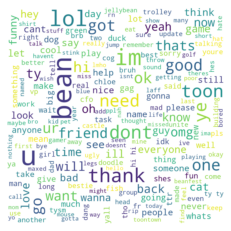

In [22]:
#Generating a word cloud
cleanwords2 = ' '.join([word for word in cleanwords])
wc = wordcloud.WordCloud(width=1000, height=1000, random_state=24, 
              max_font_size=125, background_color='white').generate(cleanwords2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [23]:
#Using vaderSentiment

In [24]:
corpus_vader = corpus.drop(columns=['subjectivity', 'polarity', 'analysis'])

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
corpus_vader['scores'] = corpus_vader['text'].apply(analyzer.polarity_scores)

In [27]:
#Determining if message has been deemed positive, negative, neutral

def get_analysis(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [28]:
#compound score indicates overall polarity of sentiment as judged by analyzer

compounds = []
for i in range(4000):
    compounds.append(corpus_vader['scores'].iloc[i]['compound'])
corpus_vader['compounds'] = compounds
corpus_vader['analysis'] = corpus_vader['compounds'].apply(get_analysis)
corpus_vader.drop(columns=['compounds'], inplace=True)

In [29]:
#Positive, negative, neutral messages
vpos = corpus_vader[corpus_vader['analysis'] == 'positive']
vneg = corpus_vader[corpus_vader['analysis'] == 'negative']
vneu = corpus_vader[corpus_vader['analysis'] == 'neutral']

In [30]:
#Percentages for each category
vp = round((vpos.shape[0]/4000)*100, 1)
vn = round((vneg.shape[0]/4000)*100, 1)
vne = round((vneu.shape[0]/4000)*100, 1)
print(vp, vn, vne)

29.1 13.2 57.7


In [33]:
vpos.describe()

,length,charlength
count,1166.000000,1166.000000
mean,3.920240,17.602916
std,2.728892,12.666984
min,1.000000,2.000000
25%,2.000000,7.000000
50%,3.000000,15.000000
75%,5.000000,25.000000
max,14.000000,58.000000


In [34]:
vneg.describe()

,length,charlength
count,526.000000,526.000000
mean,4.328897,19.587452
std,2.536627,12.382590
min,1.000000,2.000000
25%,2.000000,10.000000
50%,4.000000,17.000000
75%,6.000000,27.000000
max,13.000000,59.000000


In [35]:
vneu.describe()

,length,charlength
count,2308.000000,2308.000000
mean,3.445841,15.326256
std,2.372380,11.148160
min,1.000000,1.000000
25%,2.000000,6.000000
50%,3.000000,13.000000
75%,5.000000,22.000000
max,16.000000,64.000000


In [36]:
#vS can better interpret online speech nuances, but the numerical features of each group
#remain the same as those of the groups as determined by textblob

In [37]:
#Finding instances where the two analyzers differ in their assessment

In [38]:
corpus2 = corpus.copy()
corpus_vader2 = corpus_vader.copy()

In [40]:
corpus2['analyzer'] = 'textblob'
corpus_vader2['analyzer'] = 'vaderSentiment'

In [41]:
corpus2.drop(columns=['polarity'], inplace=True)
corpus_vader2.drop(columns=['scores'], inplace=True)

In [42]:
corpus2.rename(columns={'analysis': 'textblob'}, inplace=True)
corpus_vader2.rename(columns={'analysis': 'vaderSentiment'}, inplace=True)

In [43]:
#Finding indices where judgments differ between the 2 analyzers
indices = []
for i in range(4000):
    if corpus2.iloc[i]['textblob'] != corpus_vader2.iloc[i]['vaderSentiment']:
        indices.append(i)

In [44]:
#Dropping rows which do not differ
corpus2.drop(axis=0, index=[r for r in np.arange(0,4000) if r not in indices], inplace=True)
corpus_vader2.drop(axis=0, index=[r for r in np.arange(0,4000) if r not in indices], inplace=True)

In [45]:
corpus2['vaderSentiment'] = corpus_vader2['vaderSentiment']

In [46]:
corpus2.describe()

,length,charlength,subjectivity
count,1118.000000,1118.000000,1118.000000
mean,4.328265,19.595707,0.165705
std,2.712834,12.804824,0.269973
min,1.000000,2.000000,0.000000
25%,2.000000,10.000000,0.000000
50%,4.000000,18.000000,0.000000
75%,6.000000,27.000000,0.333333
max,15.000000,58.000000,1.000000


In [47]:
corpus.describe()

,length,charlength,subjectivity,polarity
count,4000.000000,4000.00000,4000.000000,4000.000000
mean,3.700250,16.55025,0.194550,0.060834
std,2.522794,11.87313,0.318523,0.271440
min,1.000000,1.00000,0.000000,-1.000000
25%,2.000000,7.00000,0.000000,0.000000
50%,3.000000,14.00000,0.000000,0.000000
75%,5.000000,23.00000,0.400000,0.000000
max,16.000000,64.00000,1.000000,1.000000


In [48]:
corpus_vader.describe()

,length,charlength
count,4000.000000,4000.00000
mean,3.700250,16.55025
std,2.522794,11.87313
min,1.000000,1.00000
25%,2.000000,7.00000
50%,3.000000,14.00000
75%,5.000000,23.00000
max,16.000000,64.00000


In [51]:
#Looking at only the messages themselves
analyses = corpus2.drop(columns=['subjectivity', 'length', 'charlength', 'analyzer'])

In [52]:
analyses

,text,tokens,textblob,vaderSentiment
1,youre right,"[youre, right]",positive,neutral
8,nothing really i was gonna afk a bit,"[nothing, really, i, was, gonna, afk, a, bit]",positive,neutral
15,yeah we eat you,"[yeah, we, eat, you]",neutral,positive
17,lolol,[lolol],positive,neutral
18,also playing is my fav kesha song,"[also, playing, is, my, fav, kesha, song]",neutral,positive
20,wild,[wild],positive,neutral
22,depressed,[depressed],neutral,negative
25,yes!,[yes!],neutral,positive
26,that was my problem,"[that, was, my, problem]",neutral,negative
27,it took me checking like 30 hqs!,"[it, took, me, checking, like, 30, hqs!]",neutral,positive


In [53]:
#Looking at most frequent tokens

In [54]:
#Treating you and u as different tokens
corpus_df = pd.DataFrame(cleanwords[0].split(), columns=['token'])
counts = corpus_df.value_counts().rename_axis('token').reset_index(name='counts')

In [55]:
#Treating you and u as the same token
corpus_df2 = corpus_df.copy()
corpus_df2.replace({'u':'you'}, inplace=True)
counts2 = corpus_df2.value_counts().rename_axis('token').reset_index(name='counts')

In [56]:
#Some plotting...

In [57]:
#Looking at the characteristics of these two tokens a bit more closely

In [58]:
u_indices = []
you_indices = []

for i in range(4000):
    if 'you' in corpus['tokens'].iloc[i]:
        you_indices.append(i)
    elif 'u' in corpus['tokens'].iloc[i]:
        u_indices.append(i)
    else:
        continue

In [60]:
corpus3 = corpus.copy()
you = corpus3.drop(axis=0, index=[i for i in np.arange(4000) if i not in you_indices])
u = corpus3.drop(axis=0, index=[i for i in np.arange(4000) if i not in u_indices])

In [61]:
you.describe()

,length,charlength,subjectivity,polarity
count,248.000000,248.000000,248.000000,248.000000
mean,5.451613,24.576613,0.195969,0.097818
std,2.527116,11.782534,0.324483,0.258261
min,1.000000,3.000000,0.000000,-0.700000
25%,4.000000,16.000000,0.000000,0.000000
50%,5.000000,22.000000,0.000000,0.000000
75%,7.000000,32.000000,0.371250,0.000000
max,16.000000,64.000000,1.000000,1.000000


In [62]:
u.describe()

,length,charlength,subjectivity,polarity
count,183.000000,183.000000,183.000000,183.000000
mean,5.109290,20.404372,0.211232,0.038345
std,2.399421,11.256763,0.334652,0.249093
min,2.000000,4.000000,0.000000,-0.800000
25%,3.000000,13.000000,0.000000,0.000000
50%,5.000000,18.000000,0.000000,0.000000
75%,6.000000,25.000000,0.435606,0.000000
max,14.000000,55.000000,1.000000,1.000000
